In [295]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
%matplotlib inline


data = pd.read_csv("synopsisData.csv")

## Analyzing Data

In [296]:
data.head(5)

,Max,Impulse,Size,Result
0,39.0,477.8,8.0,1
1,65.0,456.3,9.5,1
2,71.0,352.1,7.0,1
3,50.6,284.7,7.0,0
4,51.7,277.2,8.0,0


In [297]:
print(len(data))
print(type(data))

115
<class 'pandas.core.frame.DataFrame'>


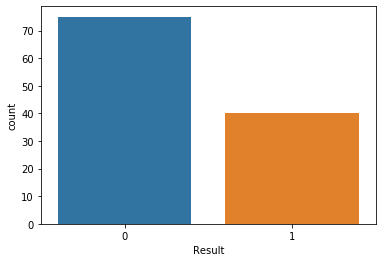

In [298]:
sns.countplot(x = "Result", data = data)



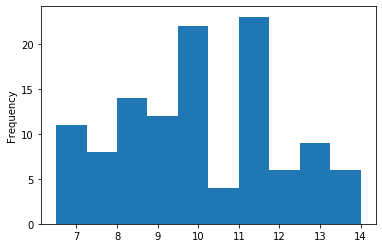

In [299]:
data["Size"].plot.hist()

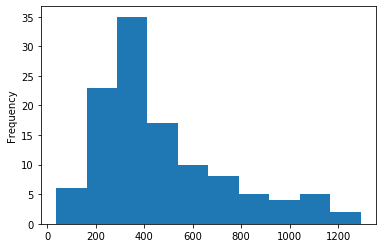

In [300]:
data["Impulse"].plot.hist()

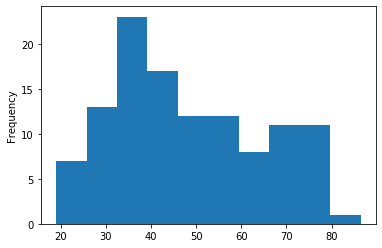

In [301]:
data["Max"].plot.hist()

## Training the model

In [302]:
%matplotlib notebook
X = data.drop("Result", axis = 1)
y = data["Result"]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35
                                                    , random_state=42)
from sklearn.linear_model import LogisticRegression
logModel = LogisticRegression()
logModel.fit(X_train, y_train)
predictions = logModel.predict(X_test)
from sklearn.metrics import confusion_matrix

/Users/michaelpeng/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


## Analyzing the Model

In [303]:
confusion_matrix(y_test, predictions)

array([[24,  1],
       [ 6, 10]])

In [304]:
confusion_matrix(y_test, predictions)
coef = logModel.coef_[0]
print (coef)
logModel.predict_proba(X_test)[:,1]
intercept = logModel.intercept_[0]
print(intercept)
hi = np.array(X_test["Size"])
logModel.predict(X_test)
vals = []
for i in y_train:
    vals.append(i)
print(logModel.predict_proba(X_test)[:,1])

[ 0.04474543  0.00341801 -0.40582862]
-0.6113047357256702
[0.94834997 0.35500247 0.03331574 0.38775083 0.76929246 0.14646425
 0.19908642 0.23128163 0.31055585 0.95377142 0.04251358 0.04311916
 0.65906763 0.1283195  0.07720052 0.38231467 0.20010467 0.08784641
 0.38277022 0.8708529  0.04040908 0.75294616 0.67713164 0.43089891
 0.24151898 0.05704616 0.10740331 0.73452641 0.20763992 0.38946665
 0.22976184 0.03438192 0.16949775 0.91972664 0.95447638 0.38663396
 0.58179613 0.15843291 0.16624875 0.14675274 0.11431117]


In [305]:
logModel.predict_proba(X_test)[:,1]

array([0.94834997, 0.35500247, 0.03331574, 0.38775083, 0.76929246,
       0.14646425, 0.19908642, 0.23128163, 0.31055585, 0.95377142,
       0.04251358, 0.04311916, 0.65906763, 0.1283195 , 0.07720052,
       0.38231467, 0.20010467, 0.08784641, 0.38277022, 0.8708529 ,
       0.04040908, 0.75294616, 0.67713164, 0.43089891, 0.24151898,
       0.05704616, 0.10740331, 0.73452641, 0.20763992, 0.38946665,
       0.22976184, 0.03438192, 0.16949775, 0.91972664, 0.95447638,
       0.38663396, 0.58179613, 0.15843291, 0.16624875, 0.14675274,
       0.11431117])

In [306]:
intercept = logModel.intercept_[0]
print(intercept)

-0.6113047357256702


In [307]:
hi = np.array(X_test["Size"])

In [308]:
logModel.predict(X_test)

array([1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0])

In [309]:
vals = []
for i in y_train:
    vals.append(i)
print(logModel.predict_proba(X_test)[:,1])

%matplotlib notebook
prob = logModel.predict_proba(X_test)[:,1]
#Parsing data to be plotted on 3D Graph
f = open('synopsisData.csv', 'r')
reader = csv.reader(f)
everything = []
count = 0
for row in reader:
      if count != 0:
            # print(row)
            everything.append(row)
      count=+1
x_vals = []
y_vals = []
z_vals = []
output = []
for row in everything:
      for i in range(len(row)):
            if i == 0:
                  x_vals.append(float(row[i]))
            elif i == 1:
                  y_vals.append(float(row[i]))

            elif i == 2:
                  z_vals.append(float(row[i]))
            else:
                  output.append(float(row[i]))
# Data Parsing for x values data

i_data = []
m_data = []
s_data = []
i_data = np.array(X_test["Impulse"])
m_data = np.array(X_test["Max"])
s_data = np.array(X_test["Size"])
# The Entirety of the visualization process
# First plots the plane and points into a 3D Graph
# Then plots each individual correlation graph to see how the sigmoid function matches
# Entire Visualization of the decision boundary corresponding to the points

# plotting 3D Graph with plane as decision boundary
# plt.style.use('ggplot')
d = 1
# create x,y
xx, yy = np.meshgrid(np.arange(0, 100.0, 1.0), np.arange(0, 1000, 10.0))
# calculate corresponding z
z = (coef[0] * xx + coef[1]* yy +intercept) * 1. / (-1 * coef[2])

[0.94834997 0.35500247 0.03331574 0.38775083 0.76929246 0.14646425
 0.19908642 0.23128163 0.31055585 0.95377142 0.04251358 0.04311916
 0.65906763 0.1283195  0.07720052 0.38231467 0.20010467 0.08784641
 0.38277022 0.8708529  0.04040908 0.75294616 0.67713164 0.43089891
 0.24151898 0.05704616 0.10740331 0.73452641 0.20763992 0.38946665
 0.22976184 0.03438192 0.16949775 0.91972664 0.95447638 0.38663396
 0.58179613 0.15843291 0.16624875 0.14675274 0.11431117]


## Data Visualization

<IPython.core.display.Javascript object>


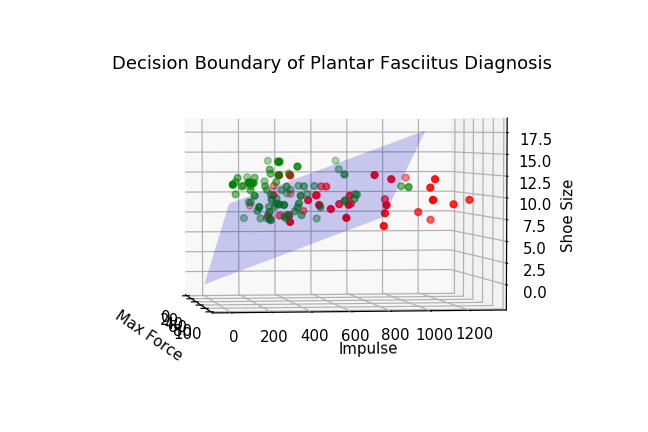

Text(0.5, 0.92, 'Decision Boundary of Plantar Fasciitus Diagnosis')

In [310]:
# Plot the Surface
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.plot_surface(xx, yy, z, alpha=0.2, color = 'blue')
# Plot Each Point

no_x = []
no_y = []
no_z = []

yes_x = []
yes_y = []
yes_z = []

for i in range(len(x_vals)):
      if (output[i] == 0):
            no_x.append(x_vals[i])
            no_y.append(y_vals[i])
            no_z.append(z_vals[i])
            # ax.scatter(x_vals[i] , y_vals[i] , z_vals[i],  color='green')
      else:
            yes_x.append(x_vals[i])
            yes_y.append(y_vals[i])
            yes_z.append(z_vals[i])
            # ax.scatter(x_vals[i] , y_vals[i] , z_vals[i],  color='red')

ax.scatter(no_x, no_y, no_z, color='green', label = 'Negative')
ax.scatter(yes_x, yes_y, yes_z, color='red', label = 'Positive')

# ax.legend()

ax.set_xlabel('Max Force')
ax.set_ylabel('Impulse')
ax.set_zlabel('Shoe Size')
ax.set_title('Decision Boundary of Plantar Fasciitus Diagnosis')

<IPython.core.display.Javascript object>


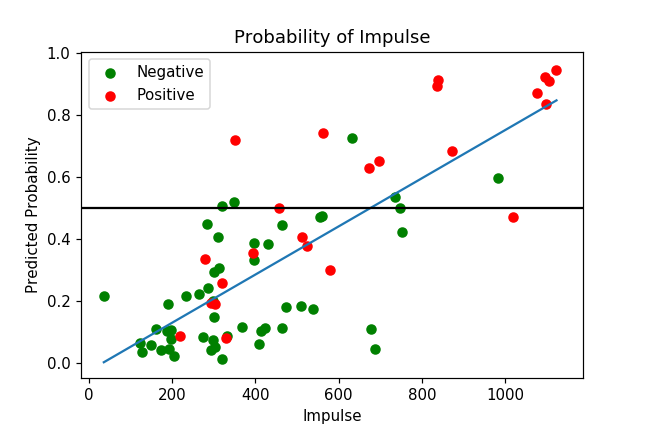

<IPython.core.display.Javascript object>


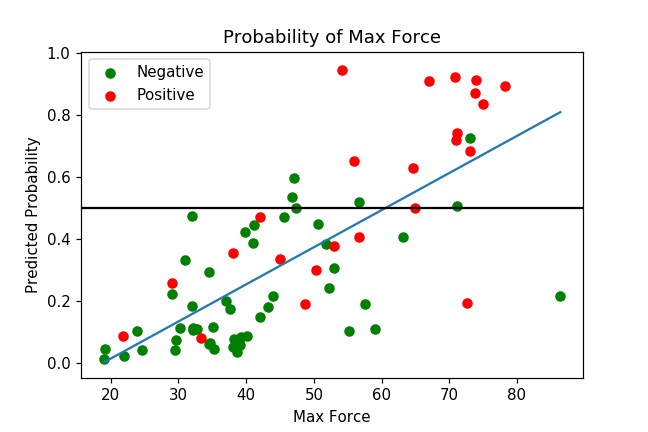

<IPython.core.display.Javascript object>


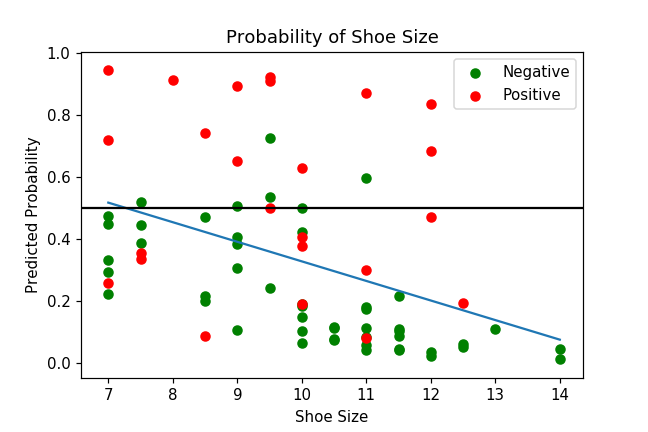

In [311]:
# plotting probability Graphs
fig1 = plt.figure()
ax1 = fig1.add_subplot(111)


# Plotting Each Individual Graph Correlations
prob = logModel.predict_proba(X_train)[:,1]
i_data = []
m_data = []
s_data = []
i_data = np.array(X_train["Impulse"])
m_data = np.array(X_train["Max"])
s_data = np.array(X_train["Size"])## Data Visualization)
every_X = []
every_y = []
d_no = []
p_no = []
d_yes = []
p_yes = []
for i in range(len(i_data)):
      if vals[i] == 0:
            d_no.append(i_data[i])
            p_no.append(prob[i])
            every_X.append(i_data[i])
            every_y.append(prob[i])
            
      else:
            d_yes.append(i_data[i])
            p_yes.append(prob[i])
            every_X.append(i_data[i])
            every_y.append(prob[i])
ax1.scatter(d_no, p_no, color = 'green',marker="o", label = "Negative")
ax1.scatter(d_yes, p_yes, color = 'red',marker="o", label = "Positive")

# m, b = np.polyfit(every_X, every_y, 1)

ax1.legend()
ax1.set_title("Probability of Impulse")
ax1.set_xlabel('Impulse')
ax1.set_ylabel('Predicted Probability')

ax1.plot(np.unique(every_X), np.poly1d(np.polyfit(every_X, every_y, 1))(np.unique(every_X)))
ax1.axhline(.5, color='black')

fig2 = plt.figure()
ax2 = fig2.add_subplot(111)

d_no = []
p_no = []
every1_X = []
every1_y = []
d_yes = []
p_yes = []
for i in range(len(i_data)):
      if vals[i] == 0:
            d_no.append(m_data[i])
            p_no.append(prob[i])
            every1_X.append(m_data[i])
            every1_y.append(prob[i])
            
      else:
            d_yes.append(m_data[i])
            p_yes.append(prob[i])
            every1_X.append(m_data[i])
            every1_y.append(prob[i])
ax2.scatter(d_no, p_no, color = 'green',marker="o", label = 'Negative')
ax2.scatter(d_yes, p_yes, color = 'red',marker="o", label = 'Positive')
ax2.legend()
ax2.plot(np.unique(every1_X), np.poly1d(np.polyfit(every1_X, every1_y, 1))(np.unique(every1_X)))
ax2.set_title("Probability of Max Force")
ax2.set_xlabel('Max Force')
ax2.set_ylabel('Predicted Probability')
ax2.axhline(.5, color='black')

fig3 = plt.figure()
ax3 = fig3.add_subplot(111)
every2_X = []
every2_y = []
d_no = []
p_no = []
d_yes = []
p_yes = []
for i in range(len(i_data)):
      if vals[i] == 0:
            d_no.append(s_data[i])
            p_no.append(prob[i])
            every2_X.append(s_data[i])
            every2_y.append(prob[i])
            
      else:
            d_yes.append(s_data[i])
            p_yes.append(prob[i])
            every2_X.append(s_data[i])
            every2_y.append(prob[i])


ax3.scatter(d_no, p_no, color = 'green',marker="o", label = 'Negative')
ax3.scatter(d_yes, p_yes, color = 'red',marker="o", label = 'Positive')
ax3.legend()
ax3.plot(np.unique(every2_X), np.poly1d(np.polyfit(every2_X, every2_y, 1))(np.unique(every2_X)))
ax3.set_title("Probability of Shoe Size")
ax3.set_xlabel('Shoe Size')
ax3.set_ylabel('Predicted Probability')
ax3.axhline(.5, color='black')


# ax1.legend(loc## Data Visualization='upper right')
plt.show()


<IPython.core.display.Javascript object>


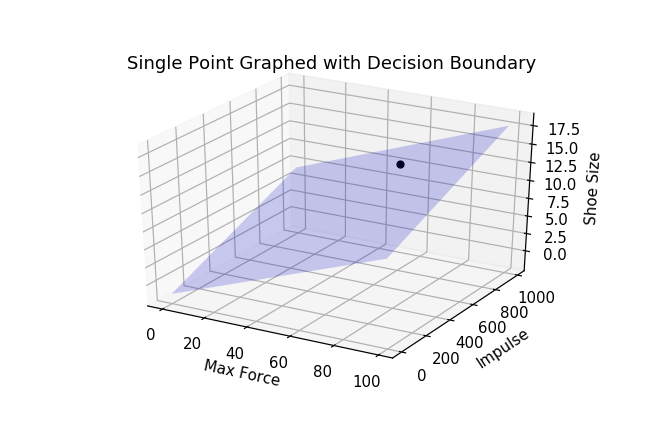

Probability Risk Factor:  0.5525592180312033
Single Variable Graphs:


<IPython.core.display.Javascript object>


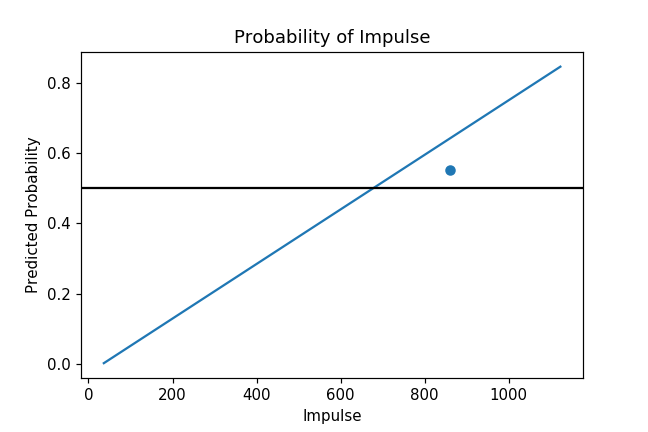

<IPython.core.display.Javascript object>


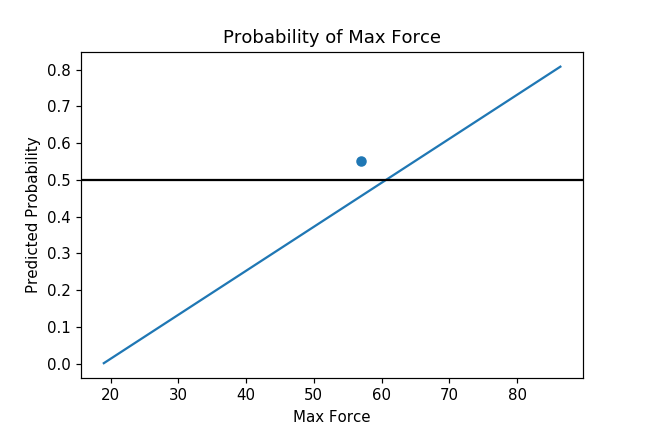

<IPython.core.display.Javascript object>


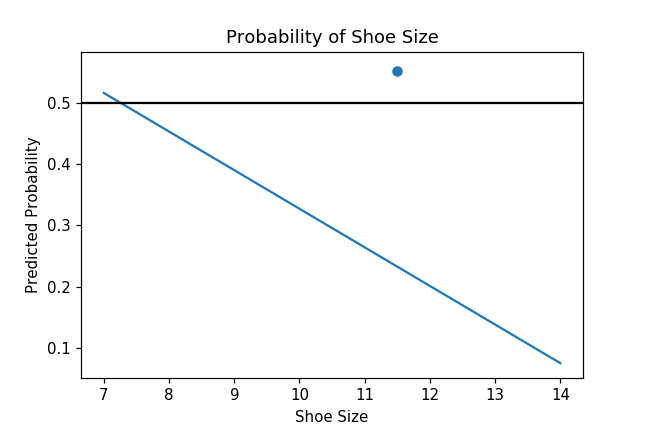

In [312]:
# Single Point Graphs
f = open('usingData.csv', 'r')
reader = csv.reader(f)
values = []
for row in reader:
    values.append(float(row[1]))## Data Visualization
fig4 = plt.figure()
ax4 = fig4.add_subplot(111, projection = '3d')
ax4.plot_surface(xx, yy, z, alpha=0.2, color = 'blue')

# Enter Point Here

point = values
ax4.scatter(point[0], point[1], point[2],color = 'black')

# dist = (coef[0] * point[0] + coef[1] * point[1] + coef[2] * point[2] + intercept)/math.sqrt(coef[0] * coef[0] + coef[1] * coef[1] + coef[2] * coef[2])
# dist = round(dist, 2)
# ax4.text(point[0], point[1], point[2],  'Risk Factor: %s' % (str(dist)), size=8, zorder=1, color='k') 

ax4.set_xlabel('Max Force')
ax4.set_ylabel('Impulse')
ax4.set_zlabel('Shoe Size')
ax4.set_title('Single Point Graphed with Decision Boundary')

data = {'Max':[values[0]],
        'Impulse':[values[1]], 'Size': [values[2]]}


# Create DataFrame
df = pd.DataFrame(data)
# print(df)
preds = logModel.predict(df)
prob_val = logModel.predict_proba(df)[:,1]



print("Probability Risk Factor: ",prob_val[0])

print("Single Variable Graphs:")


# plt.style.use('_classic_test_patch')
fig5 = plt.figure()
ax5 = fig5.add_subplot(111)
ax5.plot(np.unique(every_X), np.poly1d(np.polyfit(every_X, every_y, 1))(np.unique(every_X)))
ax5.set_title("Probability of Impulse")
ax5.set_xlabel('Impulse')
ax5.set_ylabel('Predicted Probability')
ax5.axhline(.5, color='black')
ax5.scatter(point[1], prob_val)


fig6 = plt.figure()
ax6 = fig6.add_subplot(111)
ax6.plot(np.unique(every1_X), np.poly1d(np.polyfit(every1_X, every1_y, 1))(np.unique(every1_X)))
ax6.set_title("Probability of Max Force")
ax6.set_xlabel('Max Force')
ax6.set_ylabel('Predicted Probability')
ax6.axhline(.5, color='black')
ax6.scatter(point[0], prob_val)

fig7 = plt.figure()
ax7 = fig7.add_subplot(111)
ax7.plot(np.unique(every2_X), np.poly1d(np.polyfit(every2_X, every2_y, 1))(np.unique(every2_X)))
ax7.set_title("Probability of Shoe Size")
ax7.set_xlabel('Shoe Size')
ax7.set_ylabel('Predicted Probability')
ax7.axhline(.5, color='black')
ax7.scatter(point[2], prob_val)

